# Semeion Handwritten Digit Data Set

http://archive.ics.uci.edu/ml/datasets/Semeion+Handwritten+Digit

In [1]:
import pandas as pd

data_set = 'data_sets/semeion.data'

names = map(str, range(0,256))

for i in range(1,11):
    names.append(str('y_%d' % i))

target_names = names[256:]  
data_names = names[:256]
 

df = pd.read_csv(data_set, index_col=False, delimiter = r"\s+", names = names )



In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Columns: 266 entries, 0 to y_10
dtypes: float64(256), int64(10)
memory usage: 3.2 MB
None
                 0            1            2            3            4  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      0.095417     0.153798     0.231011     0.301318     0.380414   
std       0.293883     0.360868     0.421612     0.458975     0.485641   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6            7            8            9  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      0.464532   

In [5]:
df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10
1379,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1559,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
186,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


### Средние значения цифр

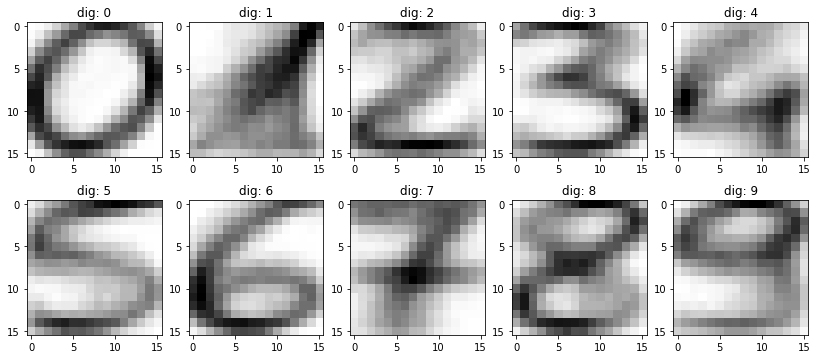

In [16]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.figure(figsize=(14,6))


for i in range(1,11):
    key = 'y_%d' % i 
    v = df[df[key]==1].mean(axis=0).values[:256]  
    ax = plt.subplot(2,5, i)  
    plt.title( 'dig: %d' % (i-1))
    ax.imshow(v.reshape(16,16), cmap=plt.cm.gray_r)  

plt.show()    

### Распределение по классам

<BarContainer object of 10 artists>

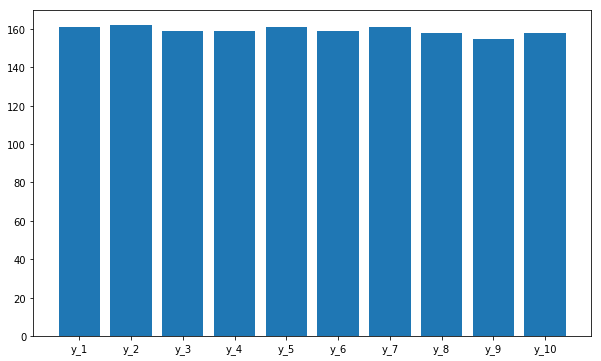

In [27]:
 
data = df[target_names].sum().values 
plt.figure(figsize = (10, 6))
plt.bar(target_names, data)


In [ ]:
#import seaborn as sns

#sns.pairplot(df, hue = 'target')

### KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


In [11]:
knn = KNeighborsClassifier()

nca_pipe = Pipeline([('knn', knn)])
nca_pipe.fit(df[data_names], df[target_names])


print(nca_pipe.score(df[data_names], df[target_names])) 



0.9296924042686755


In [12]:
print classification_report(knn.predict(df[data_names]), df[target_names])


             precision    recall  f1-score   support

          0       0.99      0.97      0.98       164
          1       0.99      0.87      0.93       183
          2       0.96      0.97      0.97       156
          3       0.97      0.94      0.96       163
          4       0.93      0.97      0.95       153
          5       0.97      0.95      0.96       162
          6       0.96      0.97      0.97       160
          7       0.92      0.99      0.96       147
          8       0.85      0.98      0.91       134
          9       0.77      1.00      0.87       121

avg / total       0.94      0.96      0.95      1543



In [10]:
?plt.plot
